# DT2470 Lab 01: Teh Signal Processings

Simon Falk, simonfal@kth.se
961106-9619

In [8]:
import os
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

import librosa
import librosa.display
from MyAudioSegment import MyAudioSegment

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub, and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.


In [10]:
# Import elephant sound and extract the first 10 seconds:

snd_dir = '/tmp/snd'
if not os.path.exists(snd_dir):
    os.makedirs(snd_dir)
if not os.path.exists(snd_dir + "/" + "07062089.wav"):
    !wget --quiet -P /tmp/snd/ http://bbcsfx.acropolis.org.uk/assets/07062089.wav

elephant = MyAudioSegment.from_file("/tmp/snd/07062089.wav", format="wav")[:10000]
f_s = elephant.frame_rate # Store sample rate for later use
elephant.plot_channel() # Plots one channel with the right timeline


NameError: name 'plt' is not defined


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

> Portion 1 is a high-pitched sound with a well defined pitch. We can see that the middle part of the waveform is regular in frequency: the crests are equally-spaced.

> Portion 2 sounds like it is falling in note height and decaying in strength. To me it has a hard, *stiff* quality. This is contradicted by the waveform though - if we count wave crests for the first 0.05s we get 20, and if we count for the last 0.05s we get 40. So the frequency of the sound does in fact rise to the double, opposed to what would be the case if the sound fell in note height.

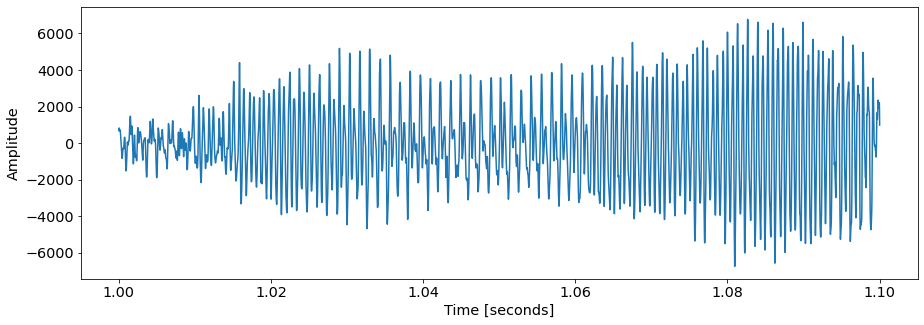

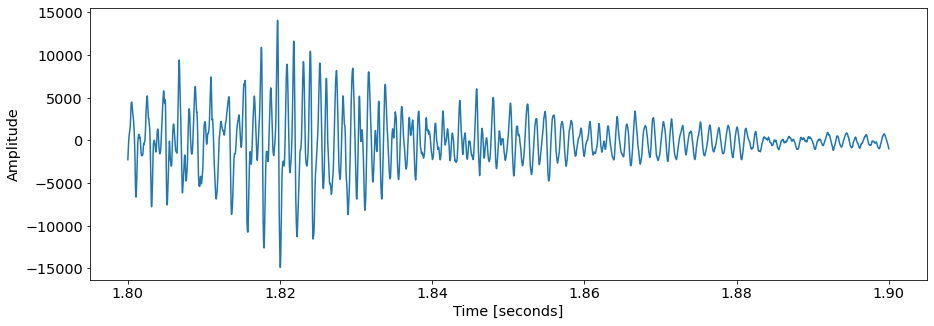

In [88]:
# Plot 0.1 s portions at t1 and t2
length = 0.1 
t1, t2 = (1.0, 1.8)

portion1 = elephant[1000*t1:1000*(t1+length)]
portion1.plot_channel(offset=t1)
plt.show()
playback.play(portion1)

portion2 = elephant[1000*t2:1000*(t2+length)]
portion2.plot_channel(offset=t2)
plt.show()
playback.play(portion2)

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in total , or two plots with two lines each.)

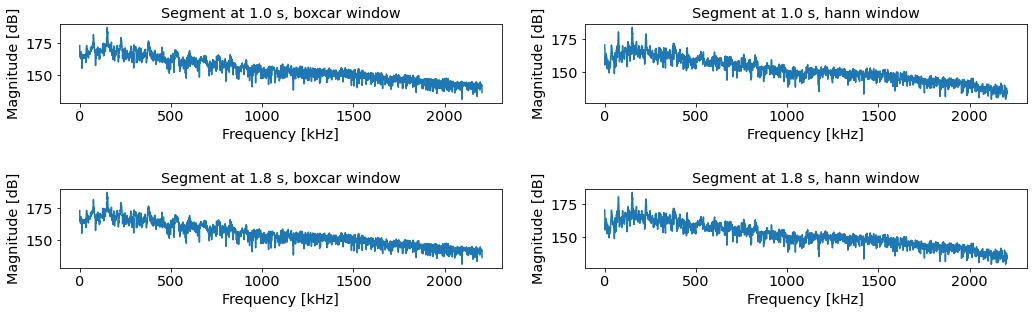

In [75]:
def decibel(intensity_np):
    '''Takes numpy array and returns decibel value of each ele'''
    ref = 10**-12
    return 10*np.log10(intensity_np/ref)

fig, axs = plt.subplots(2, 2)


magfour_1_box = np.abs(portion1.compute_fft(window='boxcar'))
axs[0,0].plot(decibel(magfour_1_box))
axs[0,0].set_title('Segment at 1.0 s, boxcar window')

magfour_1_hann = np.abs(portion1.compute_fft(window='hann'))
axs[0,1].plot(decibel(magfour_1_hann))
axs[0,1].set_title('Segment at 1.0 s, hann window')

magfour_2_box = np.abs(portion2.compute_fft(window='boxcar'))
axs[1,0].plot(decibel(magfour_1_box))
axs[1,0].set_title('Segment at 1.8 s, boxcar window')

magfour_2_hann = np.abs(portion2.compute_fft(window='hann'))
axs[1,1].plot(decibel(magfour_1_hann))
axs[1,1].set_title('Segment at 1.8 s, hann window')

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].set_xlabel("Frequency [kHz]")
        axs[i,j].set_ylabel("Magnitude [dB]")

fig.tight_layout(pad=3.0)


4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

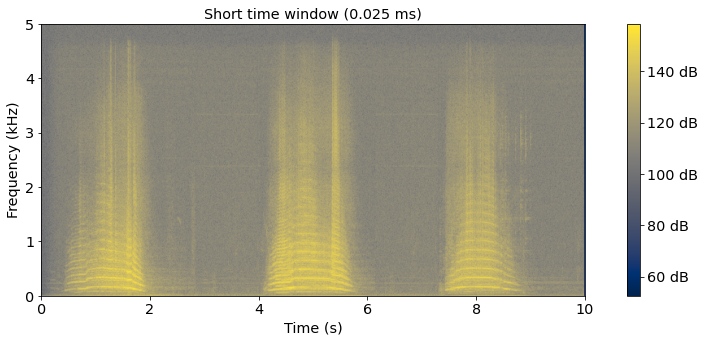

<ipython-input-75-acc20e2ace98>:4: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(intensity_np/ref)


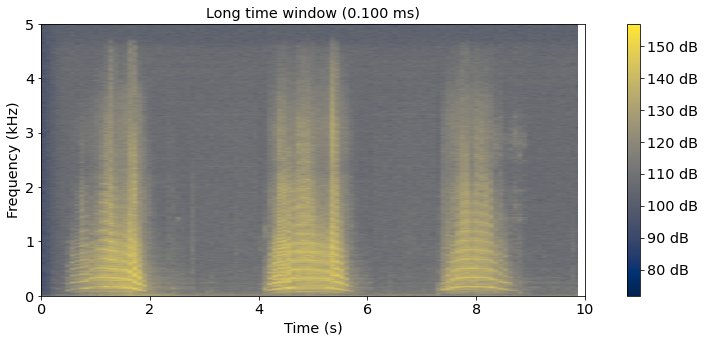

In [76]:
f_1, t_1, stft = elephant.compute_stft(window='hann', w_length=0.025, hop_size=0.010, nfft=8192)
plt.imshow(decibel(np.abs(stft)), extent=[0, 10, 0, 5], origin='lower', cmap='cividis')
plt.title("Short time window (0.025 ms)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (kHz)")
plt.colorbar(format='%02.0f dB')
plt.show()

f_2, t_2, stft2 = elephant.compute_stft(window='hann', w_length=0.100, hop_size=0.010, nfft=8192)
plt.imshow(decibel(np.abs(stft2)), extent=[0, 10, 0, 5], origin='lower', cmap='cividis')
plt.title("Long time window (0.100 ms)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (kHz)")
plt.colorbar(format='%02.0f dB')

plt.show()

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.

> In the first graph, we that the time spectrum is highly resoluted (we can see with good accuracy when a sound was heard). In the second graph, the localization in time is very blurred (see for example the small band at 9s). However, this 9s band can be localized in frequency in the second graph, although frequency content can be seen quite accurately in both graphs.



6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

/Users/simonfal/opt/anaconda3/envs/mulab1/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/simonfal/opt/anaconda3/envs/mulab1/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

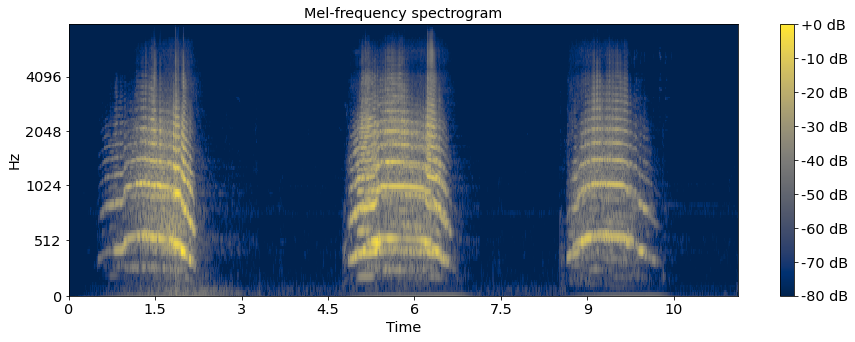

In [77]:
import librosa
import librosa.display
# Hann is default in the librosa method feature.melspectrogram
S = elephant.compute_mel(0.025, 0.010, 8192)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                              y_axis='mel', sr=elephant.frame_rate,
                              fmax=8000, ax=ax,
                              cmap='cividis')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [78]:
def fragmentize(seg,frame_size,hop_size):
    ''' take a segment and return an array of frames given frame+hop size'''
    frame_size = int(seg.frame_rate * frame_size/2)*2 # make number of samples even
    hop_size = int(seg.frame_rate * hop_size/2)

    frame_arr = []
    k = 0
    while k + frame_size < seg.frame_count():
        slize = seg.get_sample_slice(k,k+frame_size)
        frame_arr.append(slize)
        k += hop_size
    return frame_arr

def zero_crossings(frames):
    return [frame.count_crossings() for frame in frames]


2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

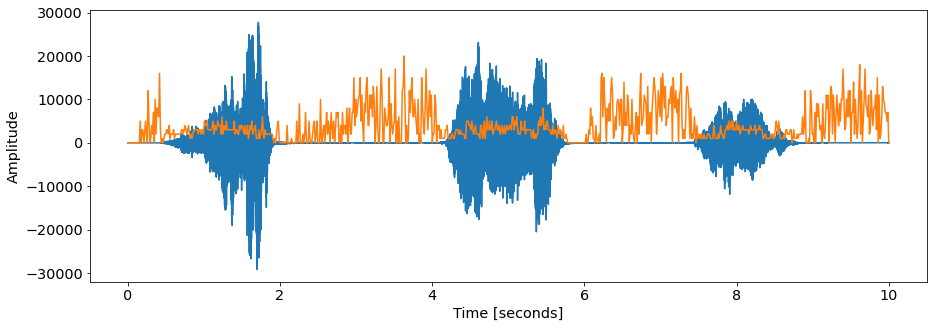

In [79]:
elephant.plot_channel()
frames = fragmentize(elephant,0.046,0.046/2)
zeros_scaled = [item*1000 for item in zero_crossings(frames)]
plt.plot(np.linspace(0,elephant.duration_seconds,len(zeros_scaled)),zeros_scaled)
plt.show()

3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [80]:
# See the function spectral_centroid in MyAudioSegment at top of page

4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

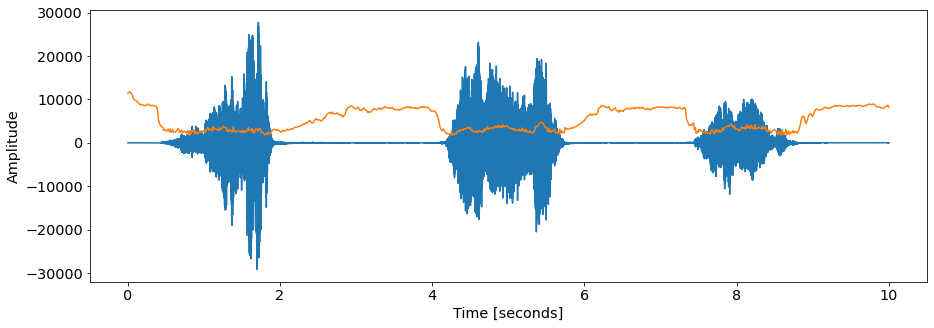

In [81]:
elephant.plot_channel()
frames = fragmentize(elephant,0.046,0.046/2)
spectral_centroids = [frame.spectral_centroid() for frame in frames]
plt.plot(np.linspace(0,elephant.duration_seconds,len(spectral_centroids)),spectral_centroids)
plt.show()

5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

Text(0.5, 1.0, 'MFCC')

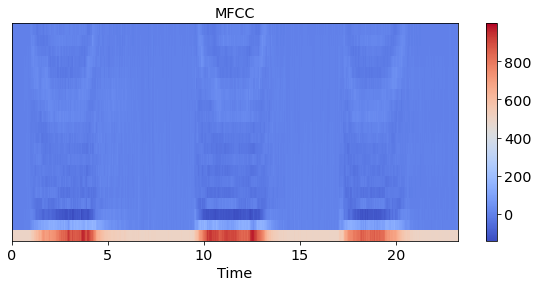

In [84]:
mfccs = elephant.compute_mfcc(10, 0.025, 0.010, 8192)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')